<a href="https://colab.research.google.com/github/perigor/EngenhariadeDados-Growdev/blob/main/C%C3%B3pia_de_Atividade_plot_e_manipula%C3%A7%C3%A3o_dados_Pandas_Semana_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [20]:
# Importando bibliotecas e base de dados.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_vgsales = pd.read_csv('/content/vgsales.csv')
df_vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


Qual foi o jogo mais vendido no mundo em 2010?



In [3]:
# Criando variável para filtrar o ano de 2010.
df_2010 = df_vgsales[df_vgsales['Year'] == 2010]

In [4]:
# Filtrando o jogo mais vendindo em 2010 dentro da coluna Global Sales.
df_mais_vendido = df_2010.loc[df_2010['Global_Sales'].idxmax()]

In [6]:
# Print
df_mais_vendido.reset_index()

,index,11183
0,Rank,16
1,Name,Kinect Adventures!
2,Platform,X360
3,Year,2010
4,Genre,Misc
5,Publisher,Microsoft Game Studios
6,NA_Sales,14.97
7,EU_Sales,4.94
8,JP_Sales,0.24
9,Other_Sales,1.67


In [7]:
print("O jogo mais vendido em 2010 foi:", df_mais_vendido['Name'])
print("Vendas Globais (em milhões de cópias):", df_mais_vendido['Global_Sales'])


O jogo mais vendido em 2010 foi: Kinect Adventures!
Vendas Globais (em milhões de cópias): 21.82


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


In [10]:
# Criando varíavel para filtrar período 2005-2016
df_sales_2015_2016 = df_vgsales[(df_vgsales['Year'] >= 2005) & (df_vgsales['Year'] <=2016)]

In [14]:
# Agrupando dados pelas Piblisher (editoras) e calculando vendas totais.
sales_editoras = df_sales_2015_2016.groupby('Publisher')['Global_Sales'].sum().reset_index()


In [16]:
# Ordenando por vendas totais.
sales_editoras = sales_editoras.sort_values(by='Global_Sales', ascending=False)
sales_editoras

,Publisher,Global_Sales
246,Nintendo,958.43
94,Electronic Arts,727.99
12,Activision,557.48
352,Ubisoft,407.24
331,Take-Two Interactive,308.02
...,...,...
272,Piacci,0.01
285,Rain Games,0.01
241,Naxat Soft,0.01
258,Ongakukan,0.01


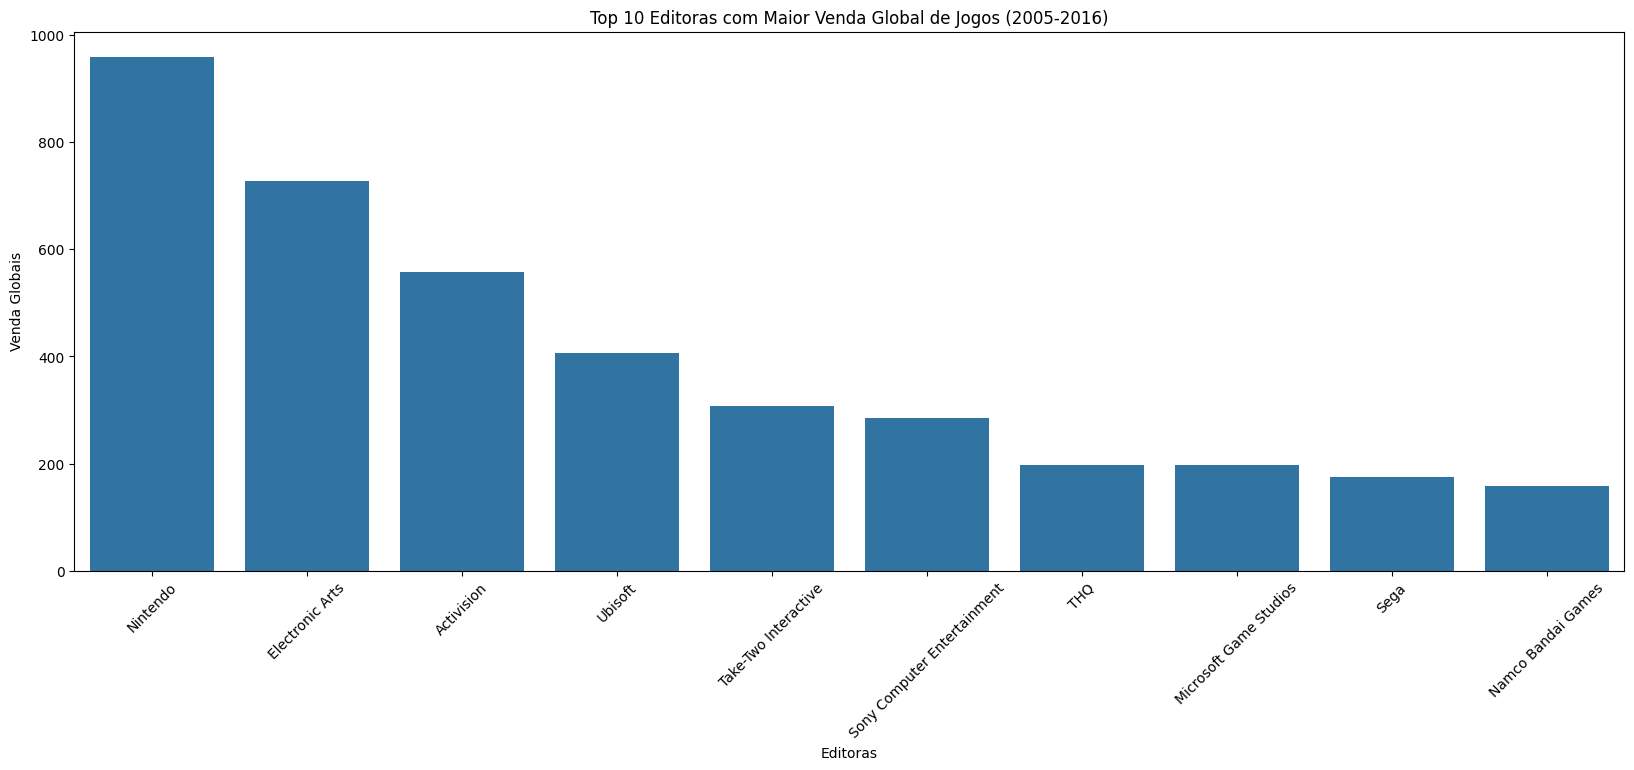

In [30]:
# Plotagem de grafico de barras.
plt.figure(figsize=(20, 7))
sns.barplot(x='Publisher', y='Global_Sales', data=sales_editoras.head(10))
plt.title('Top 10 Editoras com Maior Venda Global de Jogos (2005-2016)')
plt.xlabel('Editoras')
plt.ylabel('Venda Globais')
plt.xticks(rotation=45)
plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


In [31]:
# Criando variável para filtrar dados de 2008 e gênero "Sports".
df_2008_sports = df_vgsales[(df_vgsales['Year'] == 2008) & (df_vgsales['Genre'] == 'Sports')]

In [32]:
# Criando variável para filtrar em 2008 o menos vendido em gênero "Sports".
menos_vendido = df_2008_sports.loc[df_2008_sports['Global_Sales'].idxmin()]

In [33]:
# Print
menos_vendido.reset_index()

,index,9691
0,Rank,16058
1,Name,Winning Post 7 Maximum 2008
2,Platform,PS2
3,Year,2008
4,Genre,Sports
5,Publisher,Tecmo Koei
6,NA_Sales,0.0
7,EU_Sales,0.0
8,JP_Sales,0.01
9,Other_Sales,0.0


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [34]:
# Criando variável para filtras dados do Wii entre 2006-2010.
sales_wii_2006_2010 = df_vgsales[(df_vgsales['Platform'] == 'Wii') & (df_vgsales['Year'] >= 2006) & (df_vgsales['Year'] <= 2010)]

In [37]:
# Verificando Global Sales e Others Sales
sales_global_wii = sales_wii_2006_2010['Global_Sales'].sum()
sales_others_wii = sales_wii_2006_2010['Other_Sales'].sum()

print("Global_Sales:", sales_global_wii)
print("Other_Sales:", sales_others_wii)

Global_Sales: 809.28
Other_Sales: 70.82


In [38]:
# Calculando % de vendas em Other_Sales.
percentual_other_sales = (sales_others_wii / sales_global_wii) * 100

print("Percentual de vendas em Other_Sales:", percentual_other_sales)

Percentual de vendas em Other_Sales: 8.750988533017003


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


In [42]:
# Agrupando dados por ano e plataforma.
sales_plataforma_ano = df_vgsales.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
sales_plataforma_ano

,Year,Platform,Global_Sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
3,1983,2600,5.83
4,1983,NES,10.96
...,...,...,...
233,2016,PS4,39.25
234,2016,PSV,3.40
235,2016,WiiU,3.29
236,2016,X360,0.83


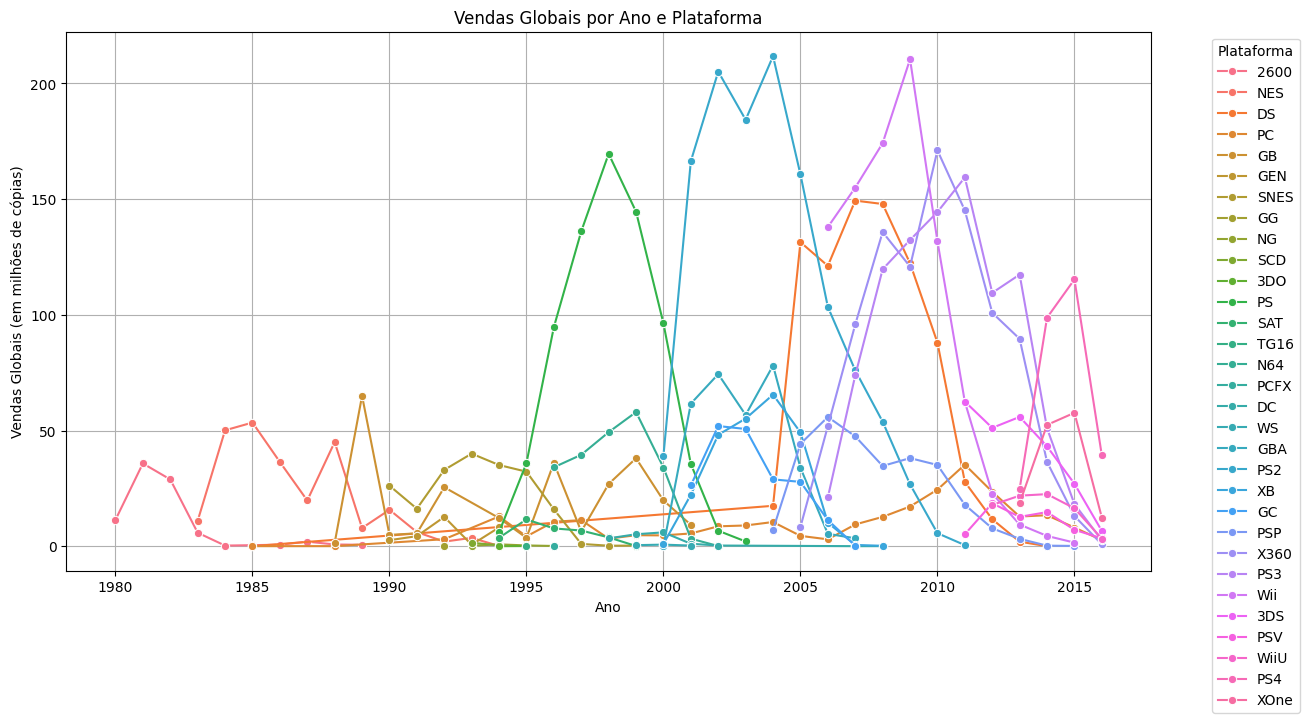

In [44]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_plataforma_ano, x='Year', y='Global_Sales', hue='Platform', marker='o')
plt.title('Vendas Globais por Ano e Plataforma')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões de cópias)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




In [45]:
# Agrupando dados por gênero e soma de vendas globais.
sales_genero = df_vgsales.groupby('Genre')['Global_Sales'].sum().reset_index()
sales_genero

,Genre,Global_Sales
0,Action,1722.87
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15
5,Puzzle,242.22
6,Racing,726.77
7,Role-Playing,923.80
8,Shooter,1026.20
9,Simulation,390.16


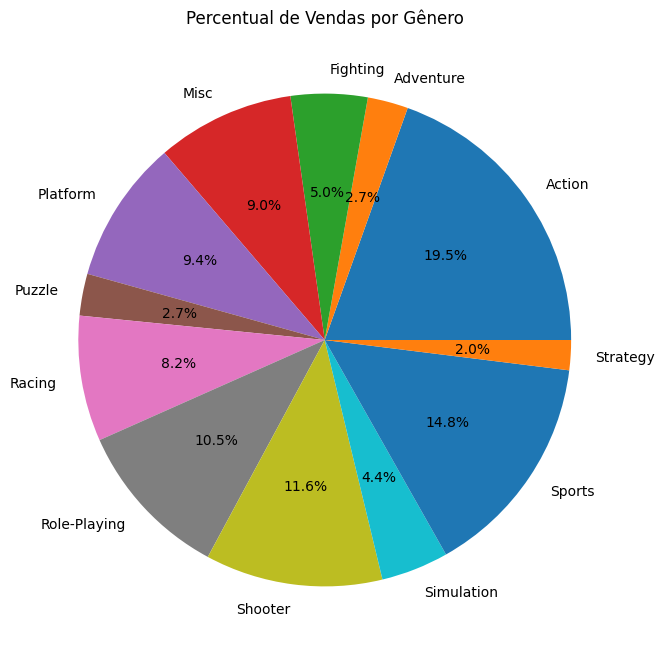

In [46]:
# Plotando Grafico de Pizza.
plt.figure(figsize=(8, 8))
plt.pie(sales_genero['Global_Sales'], labels=sales_genero['Genre'], autopct='%1.1f%%')
plt.title('Percentual de Vendas por Gênero')
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [48]:
# Importando base de dados.

df_livros = pd.read_csv('/content/livros.csv')
df_livros_classicos = pd.read_csv('/content/livros_classicos.csv')
df_livros_genero = pd.read_csv('/content/livros_genero.csv')

In [51]:
# Visualização de Df's.
df_livros.head()

,nome,paginas
0,livro 1,257
1,livro 2,106
2,livro 3,150
3,livro 4,175
4,livro 5,321


In [52]:
df_livros_classicos.head()

,nome,autor
0,livro 1,Jorge
1,livro 2,Santos
2,livro 3,Leandro
3,livro 4,Clara
4,livro 5,Flavia


In [53]:
df_livros_genero.head()

,genero,autor
0,Drama,Pedro
1,Aventura,José
2,Drama,Carlos
3,Romance,Maria
4,Romance,Fabio


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [54]:
# Concatenando livros e livros_genero.
concact_livros_livros_genero = pd.concat([df_livros, df_livros_genero], axis=1)
concact_livros_livros_genero

,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos
3,livro 4,175.0,Romance,Maria
4,livro 5,321.0,Romance,Fabio
5,livro 6,159.0,Aventura,Aline
6,livro 7,980.0,Drama,Paulo
7,livro 8,235.0,Aventura,Sandro
8,livro 9,745.0,Romance,Maria
9,livro 10,126.0,Aventura,Fabio


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [65]:
# Encontrando qual gêneros e os autores que não possuem livro correspondente.
generos_sem_livro = concact_livros_livros_genero[concact_livros_livros_genero['nome'].isnull()]['genero'].unique()
autores_sem_livro = concact_livros_livros_genero[concact_livros_livros_genero['nome'].isnull()]['autor'].unique()

In [67]:
# Print.
print("Gêneros sem livros correspondentes:")
print(generos_sem_livro)

print("\nAutores sem livros correspondentes:")
print(autores_sem_livro)

Gêneros sem livros correspondentes:
['Romance']

Autores sem livros correspondentes:
['Pedro']


Faça a junção das bases de livros e livros clássicos.

In [69]:
# Realizando merge das bases de dados
join_livros_livrosclassicos = pd.merge(df_livros, df_livros_classicos, on='nome', how='inner')
join_livros_livrosclassicos.head()

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [72]:
# Removendo os índices dos DataFrames originais
df_livros = df_livros.reset_index(drop=True)
df_livros_classicos = df_livros_classicos.reset_index(drop=True)

In [73]:
# Realizando merge das bases de dados
join_livros_livrosclassicos = pd.merge(df_livros, df_livros_classicos, on='nome', how='inner')
join_livros_livrosclassicos.head()

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia


In [74]:
join_livros_livrosclassicos.head()

,nome,paginas,autor
0,livro 1,257,Jorge
1,livro 2,106,Santos
2,livro 3,150,Leandro
3,livro 4,175,Clara
4,livro 5,321,Flavia


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.


In [79]:
# Realizar a junção dos DataFrames usando merge (inner join) e definir nomes para os índices
df_juncao = pd.merge(df_livros, df_livros_classicos, on='nome', how='inner', suffixes=('_livros', '_classicos')).set_index('nome')

# Definir nome para o índice do DataFrame resultante
df_juncao.index.name = 'Nome do Livro'

# Exibir o DataFrame resultante da junção
print("DataFrame Resultante da Junção:")
df_juncao.reset_index()

DataFrame Resultante da Junção:


,Nome do Livro,paginas,Origem_livros,autor,Origem_classicos
0,livro 1,257,Livros,Jorge,Livros Clássicos
1,livro 2,106,Livros,Santos,Livros Clássicos
2,livro 3,150,Livros,Leandro,Livros Clássicos
3,livro 4,175,Livros,Clara,Livros Clássicos
4,livro 5,321,Livros,Flavia,Livros Clássicos
5,livro 6,159,Livros,Leandro,Livros Clássicos
6,livro 7,980,Livros,Santos,Livros Clássicos
7,livro 8,235,Livros,Marcia,Livros Clássicos
8,livro 9,745,Livros,Marcia,Livros Clássicos
9,livro 10,126,Livros,Clara,Livros Clássicos


Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [81]:
# Verificando a integridade do df.
print("Número de linhas e colunas no DataFrame resultante:")
print(df_juncao.shape)


Número de linhas e colunas no DataFrame resultante:
(10, 4)


In [82]:
print("\nInformações sobre as colunas e tipos de dados:")
print(df_juncao.info())


Informações sobre as colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, livro 1 to livro 10
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paginas           10 non-null     int64 
 1   Origem_livros     10 non-null     object
 2   autor             10 non-null     object
 3   Origem_classicos  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes
None


In [83]:
print("\nAmostra do DataFrame resultante:")
print(df_juncao.head())


Amostra do DataFrame resultante:
               paginas Origem_livros    autor  Origem_classicos
Nome do Livro                                                  
livro 1            257        Livros    Jorge  Livros Clássicos
livro 2            106        Livros   Santos  Livros Clássicos
livro 3            150        Livros  Leandro  Livros Clássicos
livro 4            175        Livros    Clara  Livros Clássicos
livro 5            321        Livros   Flavia  Livros Clássicos
